# **Sprint 1**

In [1]:
#Dataset link - https://www.kaggle.com/arbethi/forest-fire?select=Dataset is stored as FFD in google drive
!unzip "E:/forest-fire-detection/IBM-Project-5474-1658766683-main/Project Development Phase/Dataset.zip"

Archive:  E:/forest-fire-detection/IBM-Project-5474-1658766683-main/Project Development Phase/Dataset.zip
   creating: Dataset/test_set/     
   creating: Dataset/test_set/forest/
  inflating: Dataset/test_set/forest/_101542074_gettyimages_956391468.jpg  
  inflating: Dataset/test_set/forest/0.48007200_1530881924_final_forest.jpg  
  inflating: Dataset/test_set/forest/0.64133000_1519374442_forest_deep.jpg  
  inflating: Dataset/test_set/forest/0.72918000_1559733279_forests1_gettyimages_.jpg  
  inflating: Dataset/test_set/forest/0.98884800_1554454572_spin.jpg  
  inflating: Dataset/test_set/forest/01_NeilBurnell_Mystical_photoverticall.jpg  
  inflating: Dataset/test_set/forest/091318_LH_forest_loss_main_FREE.jpg  
  inflating: Dataset/test_set/forest/1_chimp.jpg  
  inflating: Dataset/test_set/forest/1009821.jpg  
  inflating: Dataset/test_set/forest/111188170_river_in_the_mountain_forest.jpg  
  inflating: Dataset/test_set/forest/1170x500_Ireland_web.jpg  
  inflating: Dataset/test_s

In [2]:
PATH = "E:/forest-fire-detection/IBM-Project-5474-1658766683-main/Project Development Phase/Dataset/"

In [3]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.15,
                                   rotation_range=90,
                                   zoom_range=0.15,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train = train_datagen.flow_from_directory(PATH + 'train_set',
                                          target_size=(128,128),
                                          batch_size=32,
                                          class_mode='binary')
test = train_datagen.flow_from_directory(PATH + 'test_set',
                                          target_size=(128,128),
                                          batch_size=32,
                                          class_mode='binary')

Found 436 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


# **Sprint 2**

In [18]:
#Model Building
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import load_model
import cv2
import numpy as np
from PIL import Image
from keras.utils import img_to_array
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Initializing the model and adding CNN and Dense layers
model = Sequential()
model.add(
    Convolution2D(
        32,
        (3,3),
        input_shape=(128,128,3),
        activation='relu'
    )
)
model.add(
    MaxPooling2D(
        pool_size=(2,2)
    )
)
model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 256)               32514304  
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 32,515,457
Trainable params: 32,515,457
Non-trainable params: 0
____________________________________________

In [6]:
# Compiling the Model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy','mse'])

In [8]:
#Training the model
history = model.fit_generator(train,epochs=15,validation_data=test)

Epoch 1/15
14/14 [==============================] - 15s 1s/step - loss: 0.7016 - accuracy: 0.8417 - mse: 0.1422 - val_loss: 0.1483 - val_accuracy: 0.9504 - val_mse: 0.0419
Epoch 2/15
14/14 [==============================] - 14s 1s/step - loss: 0.2711 - accuracy: 0.9060 - mse: 0.0762 - val_loss: 0.0860 - val_accuracy: 0.9752 - val_mse: 0.0263
Epoch 3/15
14/14 [==============================] - 14s 1s/step - loss: 0.1838 - accuracy: 0.9243 - mse: 0.0576 - val_loss: 0.0719 - val_accuracy: 0.9587 - val_mse: 0.0234
Epoch 4/15
14/14 [==============================] - 14s 1s/step - loss: 0.1773 - accuracy: 0.9197 - mse: 0.0537 - val_loss: 0.1007 - val_accuracy: 0.9504 - val_mse: 0.0329
Epoch 5/15
14/14 [==============================] - 14s 966ms/step - loss: 0.1586 - accuracy: 0.9243 - mse: 0.0510 - val_loss: 0.0987 - val_accuracy: 0.9587 - val_mse: 0.0304
Epoch 6/15
14/14 [==============================] - 14s 1s/step - loss: 0.1785 - accuracy: 0.9266 - mse: 0.0541 - val_loss: 0.1085 - val_

In [29]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [30]:
#Saving the model
model.save('E:/forest-fire-detection/IBM-Project-5474-1658766683-main/Project Development Phase/Sprint 2/model.h5')

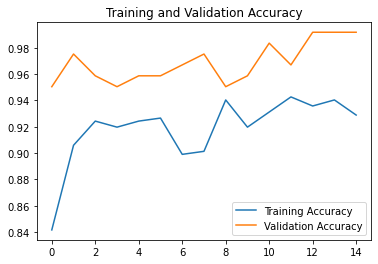

In [14]:
import matplotlib.pyplot as plt
epochs = range(0,15)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [19]:
#Testing the model
model = load_model(PATH + "Sprint 2/model.h5")
def prediction(img_path):
    i = cv2.imread(img_path)
    i = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
    img = Image.open(img_path)
    img = img.resize((128,128))
    x = img_to_array(img)
    x = np.expand_dims(x,axis=0)
    pred = model.predict(x)
    plt.imshow(i)
    print("%s"%("FIRE DETECTED!" if pred==[[1.]] else "NO FIRE DETECTED"))

1/1 [==============================] - 0s 75ms/step
NO FIRE DETECTED


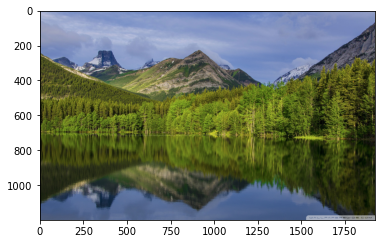

In [20]:
prediction(PATH + "test_set/forest/beautiful_mountain_forest_wallpaper_1920x1200.jpg")

1/1 [==============================] - 0s 27ms/step
FIRE DETECTED!


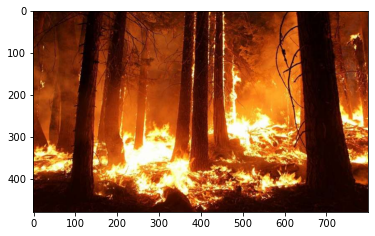

In [25]:
prediction(PATH + "test_set/with fire/forestfire.jpg")

1/1 [==============================] - 0s 26ms/step
FIRE DETECTED!


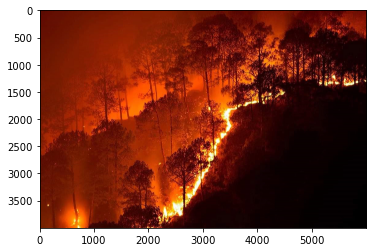

In [26]:
prediction(PATH + "test_set/with fire/Bandipur_fires_2019.jpg")

1/1 [==============================] - 0s 25ms/step
NO FIRE DETECTED


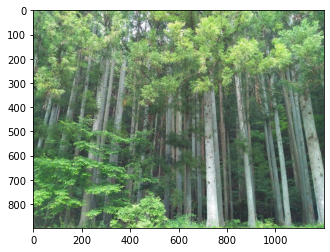

In [28]:
prediction(PATH + '/test_set/forest/aokigaharaforest_1_star.jpg')